# Modules

In [10]:
import sys
import numpy as np      
from skimage.transform import resize
from netCDF4 import Dataset                             
from scipy.ndimage import zoom
from matplotlib.patches import Rectangle                
import cartopy.crs as ccrs                              
import cartopy.feature as cfeature                   
import matplotlib.pyplot as plt                         
import warnings
warnings.filterwarnings("ignore")
import cartopy.io.shapereader as shpreader

In [11]:
geodata = Dataset("/gws/ssde/j25b/swift/rt_cores/geoloc_grids/nxny2268_2080_nxnyds164580_blobdx0.04491576_arean41_n27_27_79.nc")
lons = geodata["lons_mid"][:]
lats = geodata["lats_mid"][:]

In [12]:
# replace missing values
filtered_lons = np.where(lons == -999.999, np.nan, lons)
filtered_lats = np.where(lats == -999.999, np.nan, lats)

# Choose date and time to display

In [14]:
year = "2025"
month = "07"
day = "15"
hour = "12"
minute = "00"

In [15]:
path_core = f"/gws/ssde/j25b/swift/rt_cores/{year}/{month}/{day}/{hour}{minute}"
file = f"{path_core}/Convective_struct_extended_{year}{month}{day}{hour}{minute}_000.nc"

In [16]:
data = Dataset(file, mode='r')

# wavelet power maxima's coordinates
x0_lat = data["Pmax_lat"][:]
x0_lon = data["Pmax_lon"][:]

# wavelet power arrays
cores  = data["cores"][:, :]

# This is just to check the domain covered

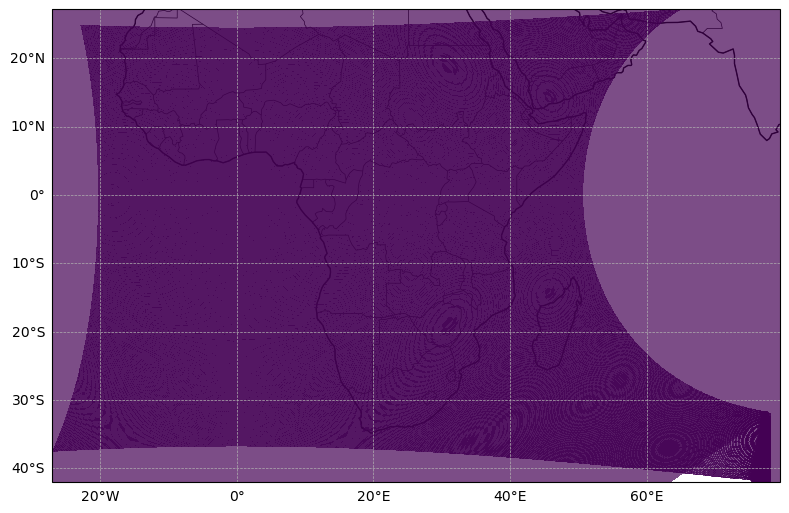

In [17]:
# Create figure and axis
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

extent = (
    np.nanmin(filtered_lons),
    np.nanmax(filtered_lons),
    np.nanmin(filtered_lats),
    np.nanmax(filtered_lats),    
)

ax.set_extent(extent, crs=ccrs.PlateCarree())

# Base features
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='none', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5, zorder=1)

# Load Natural Earth country boundaries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Gridlines
gl = ax.gridlines(draw_labels=True, alpha=1, linestyle='--', linewidth=0.5)
gl.top_labels = False
gl.right_labels = False

contour_core = ax.pcolormesh(
    lons, lats, np.ones(lats.shape),
    transform=ccrs.PlateCarree(),
    alpha=0.7,
    zorder=2
)
plt.tight_layout()
plt.show()

# Choosing domain of interest

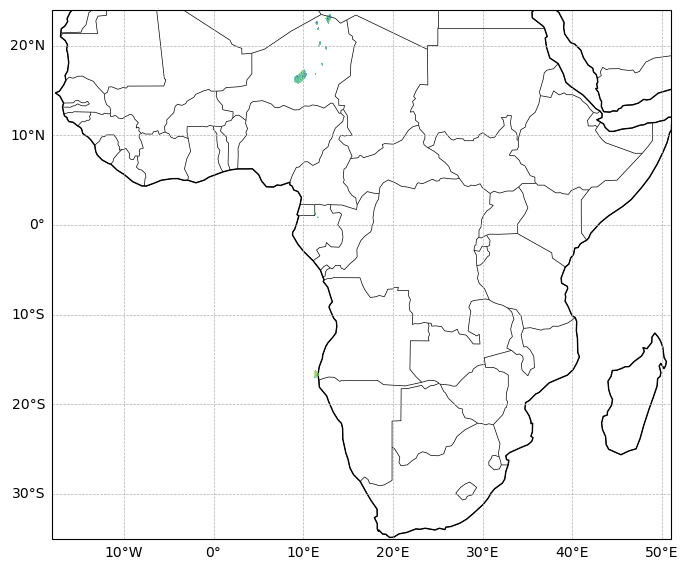

In [19]:
fig = plt.figure(figsize=(7, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

extent = (-18, 51, -35, 24)

ax.set_extent(extent, crs=ccrs.PlateCarree())

# Base features
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='none', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5, zorder=1)

# Load Natural Earth country boundaries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Gridlines
gl = ax.gridlines(draw_labels=True, alpha=1, linestyle='--', linewidth=0.5)
gl.top_labels = False
gl.right_labels = False

contour_core = ax.pcolormesh(
    lats, lons, cores,
    transform=ccrs.PlateCarree(),
    alpha=0.7,
    zorder=2
)
plt.tight_layout()
plt.show()

# Cropping the data to match the domain of interest

In [20]:
LAT_MIN = -35
LAT_MAX = 24
LON_MIN = -18
LON_MAX = 51

out_dir = ""

# TEMPORARILY convert missing to NaN for masking
lats_nan = np.where(lats == -999.999, np.nan, lats)
lons_nan = np.where(lons == -999.999, np.nan, lons)

# Africa mask
mask = (
    (lats_nan >= LAT_MIN) &
    (lats_nan <= LAT_MAX) &
    (lons_nan >= LON_MIN) &
    (lons_nan <= LON_MAX)
)

rows = np.where(mask.any(axis=1))[0]
cols = np.where(mask.any(axis=0))[0]

row_min, row_max = rows[0], rows[-1]
col_min, col_max = cols[0], cols[-1]

# crop grid
lats_crop = lats_nan[row_min:row_max+1, col_min:col_max+1]
lons_crop = lons_nan[row_min:row_max+1, col_min:col_max+1]

# convert BACK to portal-required missing value
lats_crop = np.where(np.isnan(lats_crop), -999.999, lats_crop)
lons_crop = np.where(np.isnan(lons_crop), -999.999, lons_crop)

# # save NRT Africa geolocation
# np.save(f"{out_dir}/nrt_lats_africa.npy", lats_crop)
# np.save(f"{out_dir}/nrt_lons_africa.npy", lons_crop)

print("Saved NRT Africa geolocation:", lats_crop.shape)

Saved NRT Africa geolocation: (2015, 2186)
